In [14]:
import pandas as pd

data = pd.read_csv('Data1.csv')

In [13]:
data.head()

,PovPct,Brth15to17
0,20.1,31.5
1,7.1,18.9
2,16.1,35.0
3,14.9,31.6
4,16.7,22.6


In [2]:
data.shape

(51, 6)

In [3]:
data.columns

data[['PovPct', 'Brth15to17']]

,PovPct,Brth15to17
0,20.1,31.5
1,7.1,18.9
2,16.1,35.0
3,14.9,31.6
4,16.7,22.6
5,8.8,26.2
6,9.7,14.1
7,10.3,24.7
8,22.0,44.8
9,16.2,23.2


In [4]:
# Given set of data where Pov -> Birth15to17

# y : Pov  [dependent/ Target/ prediction]
# x : Birth15to17  [independent/ input]


#Regression: f(x) = y    optimal value 'f'
#   Simple linear regression: equation of a line y = w.x + b

data = data[['PovPct', 'Brth15to17']]
data.head()

,PovPct,Brth15to17
0,20.1,31.5
1,7.1,18.9
2,16.1,35.0
3,14.9,31.6
4,16.7,22.6


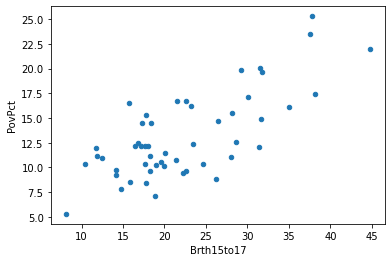

In [5]:

#data.plot.scatter(x = 'PovPct', y = 'Brth15to17')

data.plot.scatter(x = 'Brth15to17', y = 'PovPct')

In [6]:
data.shape

#split the data, train_data(80%) & test_data(20%)

from sklearn.model_selection import train_test_split

#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_data, test_data = train_test_split(data, test_size=0.2, random_state=50)


In [7]:
print(train_data.shape)

print(test_data.shape)

(40, 2)
(11, 2)


In [8]:
# use the train_data to call <..>.fit_model()
# co_effients w, b
# plot the line in the graph

X_train = train_data['Brth15to17']
Y_train = train_data['PovPct']

X_tst = test_data['Brth15to17']
Y_tst = test_data['PovPct']

from sklearn.linear_model import LinearRegression

model = LinearRegression()
pred = model.fit(X_train.to_numpy().reshape(-1, 1), Y_train.to_numpy().reshape(-1, 1))

# Simple linear regression: equation of a line y = w.x + b
print(pred.coef_)       # w
print(pred.intercept_)  # b


[[0.37493863]]
[4.86666835]


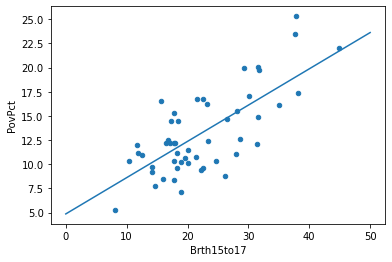

In [9]:
#plot

import matplotlib.pyplot as plt
import numpy as np

def drawLine(w, b):
  x = np.linspace(0, 50, 100)
  plt.plot(x, w * x + b)   # y = w.x +b

data.plot.scatter(x = 'Brth15to17', y = 'PovPct')
drawLine(pred.coef_[0], pred.intercept_)

In [10]:
#prediction

print(pred.predict(X_tst.to_numpy().reshape(-1, 1)))

print(Y_tst)

[[16.15232107]
 [12.40293478]
 [12.21546547]
 [11.95300843]
 [13.1903059 ]
 [11.16563731]
 [ 9.25345031]
 [21.6639189 ]
 [10.82819254]
 [13.64023226]
 [15.8148763 ]]
36    17.1
35    11.5
39    10.6
1      7.1
25     9.4
47    12.5
34    12.0
8     22.0
49     8.5
13    12.4
40    19.9
Name: PovPct, dtype: float64


In [11]:
# y = w.x +b
print(pred.predict(X_tst.to_numpy().reshape(-1, 1)))

pred.coef_[0] * X_tst + pred.intercept_

[[16.15232107]
 [12.40293478]
 [12.21546547]
 [11.95300843]
 [13.1903059 ]
 [11.16563731]
 [ 9.25345031]
 [21.6639189 ]
 [10.82819254]
 [13.64023226]
 [15.8148763 ]]


36    16.152321
35    12.402935
39    12.215465
1     11.953008
25    13.190306
47    11.165637
34     9.253450
8     21.663919
49    10.828193
13    13.640232
40    15.814876
Name: Brth15to17, dtype: float64

Multiple feature variables

In [31]:
import pandas as pd
data = pd.read_csv('Data1.csv')
dat = data[['Brth15to17','Brth18to19','PovPct']]

In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dat, test_size=0.2, random_state=40)

In [33]:
X_train = train_data[['Brth15to17','Brth18to19']]
X_tst = test_data[['Brth15to17','Brth18to19']]
Y_train = train_data['PovPct']
Y_tst = test_data['PovPct']

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
pred = model.fit(X_train.to_numpy(),Y_train.to_numpy())

In [35]:
print(pred.coef_)
print(pred.intercept_)

[ 0.5416476  -0.07021268]
6.064169347877902
